# Gradient Descent



## Learning objectives

1. Analyze a Pandas Dataframe.
2. Create Seaborn plots for Exploratory Data Analysis.
3. Train a Linear Regression Model using Scikit-Learn.



### Import Libraries

In [2]:
# Importing Pandas, a data processing and CSV file I/O libraries
import os 
import pandas as pd
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib. 
import tensorflow as tf


%matplotlib inline   

###  Load the Dataset

Insurance Sample Data

* 'age': Age of primary beneficiary
* 'sex': Insurance contractor gender, female / male
* 'bmi': Body mass index, providing an understanding of body, objective index of body weight (kg / m ^ 2) using the ratio of height to weight
* 'children': Number of children covered by health insurance / Number of dependents
* 'smoker': Smoker / Non - smoker
* 'region': The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* 'charges': Individual medical costs billed by health insurance.

In [3]:
# Importing the dataset
df = pd.read_csv('https://raw.githubusercontent.com/moonjukhim/ml/main/data/insurance.csv')
print(df.head())
print(df.info())
print(df.isnull().sum())
# Looking for how many unique values there are in the categorical features
print('Different regions - ', df['region'].unique())
print('Different numbers of children - ', df['children'].unique())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


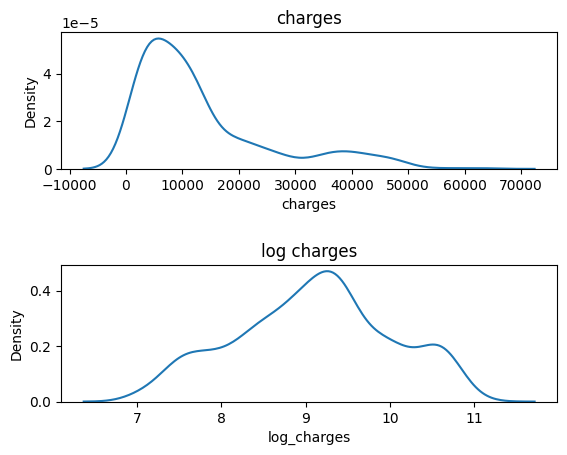

In [4]:
# Adding a log charges as well as charges to train a model to later
df['log_charges'] = np.log(df['charges'])

# PLotting the distribution of charges and log charges to check for normal distribution
fig, ax = plt.subplots(nrows=2)
sns.distplot(df['charges'], ax=ax[0], hist=False).set_title('charges')
sns.distplot(df['log_charges'], ax=ax[1], hist=False).set_title('log charges')
plt.subplots_adjust(hspace=0.7)
plt.show()

Let's check for any null values.

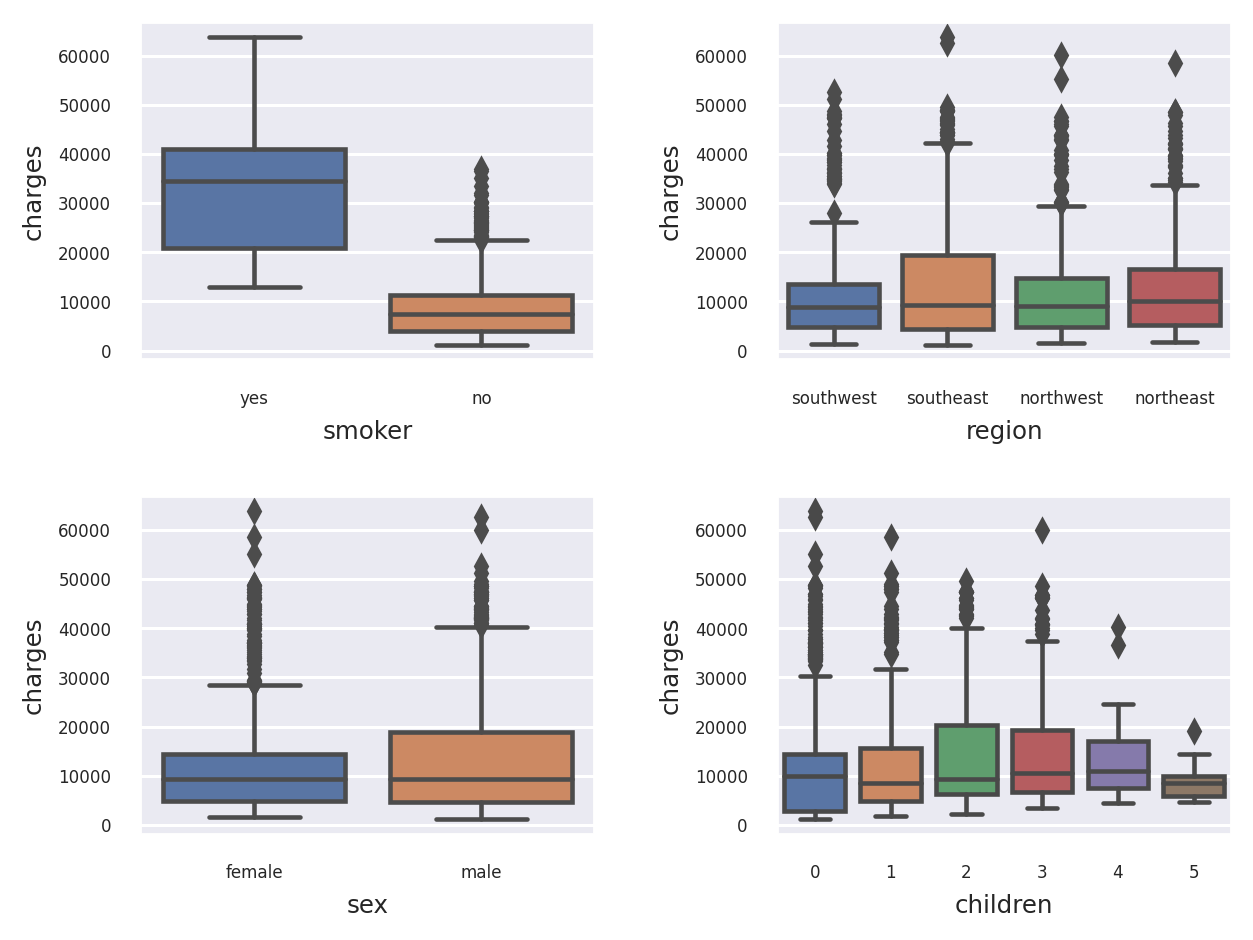

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


In [5]:
# Adjusting the font size of the figures to match the overall figure size
sns.set(font_scale = 0.5)

# Plotting box and whiskers to show the distribution of charges according to these features
fig = plt.figure(dpi=220)
plt.rcParams["axes.labelsize"] = 8
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.boxplot(data=df, x='smoker', y='charges', ax=ax)
ax = fig.add_subplot(2, 2, 2)
sns.boxplot(data=df, x='region', y='charges', ax=ax)
ax = fig.add_subplot(2, 2, 3)
sns.boxplot(data=df, x='sex', y='charges', ax=ax)
ax = fig.add_subplot(2, 2, 4)
sns.boxplot(data=df, x='children', y='charges', ax=ax)
plt.show()
sns.set(font_scale = 1)

# How many are in each category of children
print(df['children'].value_counts())

In [6]:
df['smoker'].replace(('yes', 'no'), (1, 0), inplace=True)

   age     sex     bmi  children  smoker     region      charges  log_charges
0   19  female  27.900         0       1  southwest  16884.92400     9.734176
1   18    male  33.770         1       0  southeast   1725.55230     7.453302
2   28    male  33.000         3       0  southeast   4449.46200     8.400538
3   33    male  22.705         0       0  northwest  21984.47061     9.998092
4   32    male  28.880         0       0  northwest   3866.85520     8.260197
[18 28 33 32 31]
[ 1725.5523   4449.462   21984.47061  3866.8552   3756.6216 ]
epoch=0, 기울기=38.5143, 절편=0.8434
epoch=100, 기울기=220.1017, 절편=2.5587
epoch=200, 기울기=220.1551, 절편=0.1893
epoch=300, 기울기=220.2084, 절편=-2.1774
epoch=400, 기울기=220.2616, 절편=-4.5414
epoch=500, 기울기=220.3148, 절편=-6.9028
epoch=600, 기울기=220.3679, 절편=-9.2615
epoch=700, 기울기=220.4209, 절편=-11.6175
epoch=800, 기울기=220.4739, 절편=-13.9708
epoch=900, 기울기=220.5268, 절편=-16.3215
epoch=1000, 기울기=220.5797, 절편=-18.6696
epoch=1100, 기울기=220.6325, 절편=-21.0149
epoch=1200, 기울기=220.

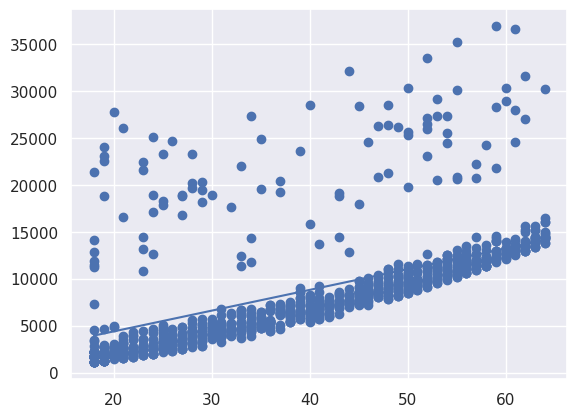

In [7]:
X = df[df['smoker'] == 0]['age'].values
y = df[df['smoker'] == 0]['charges'].values
print(df.head())
print(X[:5])
print(y[:5])

a = 0
b = 0

lr = 0.0001
epoch = 2001

for i in range(epoch):
    y_pred = a * X + b
    error = y - y_pred
    
    a_diff = -(1/len(X)) * sum(X * (error))
    b_diff = -(1/len(X)) * sum(y - y_pred)
    
    a = a - lr * a_diff
    b = b - lr * b_diff
    
    if i % 100 == 0:
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
        
y_pred = a * X + b
plt.scatter(X, y)
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)])
plt.show()

## Deep Learning

In [8]:
# Importing the dataset
df = pd.read_csv('https://raw.githubusercontent.com/moonjukhim/ml/main/data/insurance.csv') 
df.head()

df = df[df['smoker'] == 'no']

In [9]:
X = pd.DataFrame()
df.sex = pd.Categorical(df.sex)

X['sex'] = df.sex.cat.codes

In [14]:
print(X)


      sex
1       1
2       1
3       1
4       1
5       0
...   ...
1332    0
1333    1
1334    0
1335    0
1336    0

[1064 rows x 1 columns]


Leheads take a peek at the first and last five rows of the data for all columns.

In [15]:
df.smoker = pd.Categorical(df.smoker)
df.region = pd.Categorical(df.region)

X['smoker'] = df.smoker.cat.codes
X['region'] = df.region.cat.codes

In [16]:
X['age'] = df['age']
X['bmi'] = df['bmi']

#### 데이터 확인

범주형의 데이터가 연속형으로 변형되어 있는지 확인

In [17]:
X.head()

,sex,smoker,region,age,bmi
1,1,0,2,18,33.770
2,1,0,2,28,33.000
3,1,0,1,33,22.705
4,1,0,1,32,28.880
5,0,0,2,31,25.740


In [18]:
Y = df['charges']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

#### import packages

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [21]:
model = Sequential()
model.add(Dense(64, input_dim = 5, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(54, activation = 'relu'))
model.add(Dense(1))

2023-01-24 13:56:01.971554: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


#### model compile

In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'mae'])

In [23]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=200)

2023-01-24 13:56:38.305406: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
22/22 [==============================] - 1s 21ms/step - loss: 101853304.0000 - mse: 101853304.0000 - mae: 8217.7012 - val_loss: 128589216.0000 - val_mse: 128589216.0000 - val_mae: 9181.6367
Epoch 2/200
22/22 [==============================] - 0s 7ms/step - loss: 100495424.0000 - mse: 100495424.0000 - mae: 8141.9507 - val_loss: 125314880.0000 - val_mse: 125314880.0000 - val_mae: 9016.3779
Epoch 3/200
22/22 [==============================] - 0s 10ms/step - loss: 93897976.0000 - mse: 93897976.0000 - mae: 7761.6865 - val_loss: 109835160.0000 - val_mse: 109835160.0000 - val_mae: 8194.1963
Epoch 4/200
22/22 [==============================] - 0s 14ms/step - loss: 69500088.0000 - mse: 69500088.0000 - mae: 6175.4648 - val_loss: 63333916.0000 - val_mse: 63333916.0000 - val_mae: 5404.8335
Epoch 5/200
22/22 [==============================] - 0s 7ms/step - loss: 30114840.0000 - mse: 30114840.0000 - mae: 3543.3481 - val_loss: 33460298.0000 - val_mse: 33460298.0000 - val_mae: 4223.9961
Ep

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how you can interpret them.

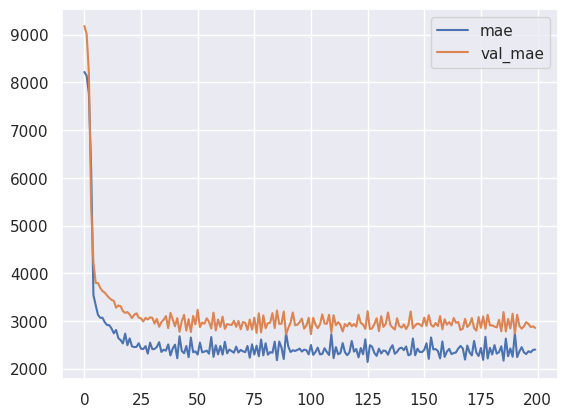

In [24]:
import matplotlib.pyplot as plt

#plot the loss and validation loss of the dataset
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')

plt.legend()

In [25]:
scores = model.evaluate(X_test, Y_test, verbose = 0)

print('Mean Squared Error : ', scores[1])
print('Mean Absolute Error : ', scores[2])

Mean Squared Error :  20711400.0
Mean Absolute Error :  2437.67578125


In [26]:
scores = model.evaluate(X_train, Y_train, verbose = 0)

print('Mean Squared Error : ', scores[1])
print('Mean Absolute Error : ', scores[2])

Mean Squared Error :  21749176.0
Mean Absolute Error :  2388.720458984375


In [27]:
Y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import r2_score

print('r2 score: ', r2_score(Y_test, Y_pred))

r2 score:  0.3807701796199482


## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because you want to minimize them.